<a href="https://colab.research.google.com/github/AnnSenina/Python_for_CL/blob/main/notebooks/%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D1%82%D0%B5%D1%82%D1%80%D0%B0%D0%B4%D0%BA%D0%B8/Python_Homo_Digitus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
name = input()
print("Добро пожаловать в Digital Humanities, ", name, "!", sep='')

Анна
Добро пожаловать в Digital Humanities, Анна!


In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Гуманитарный Python: данные и истории

Почувствуй себя Data Scientist'ом за 60 минут!

Но сначала: 

**Файл - Сохранить копию на Диске**

Перед семинаром скачайте: https://drive.google.com/drive/folders/1NOJeuOZjhHPUyX_p1heDrIJ_Wou_f7CI?usp=sharing

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/AnnSenina/main/2022.csv', decimal=',') # внимательно посмотрите на данные, в начале семинара аргумента decimal не было
data.head()

,Country,Happiness,Whisker-high,Whisker-low,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.821,7.886,7.756,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,7.710,7.563,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,7.651,7.464,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,7.586,7.437,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,7.471,7.359,1.945,1.206,0.787,0.651,0.271,0.419


In [ ]:
data.info()

Откуда пришли данные?

Данные Gallup International и исследовательского холдинга Ромир

Ссылка на исходный датасет [Kaggle](https://www.kaggle.com/datasets/mathurinache/world-happiness-report)

Международное исследование "Конец года" (End of the Year) является ежегодной традицией с 1977 года. 

В исследовании приняли участие 41 560 человек по всему миру. В каждой стране выборка составила не менее 1000 мужчин и женщин, опрос проводился в течение октября-декабря 2021 года лицом к лицу, по телефону или онлайн *(Источник: [Ромир](https://romir.ru/studies/dinamika-indeksa-schastya-v-rossii-i-v-mire))*

## Найдем самые несчастные страны

In [ ]:
data.tail() # последние 5 строк, потому что датасет уже отсортирован

,Country,Happiness,Whisker-high,Whisker-low,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
141,Botswana,3.471,3.667,3.275,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda,3.268,3.462,3.074,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,3.110,2.880,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,3.049,2.862,1.392,0.498,0.631,0.103,0.082,0.034
145,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005


In [ ]:
# в этом легко убедиться: найдем минимальное значение в столбце
data.Happiness.min()

2.404

In [ ]:
# data['GDP per capita']

## Найдем Россию

In [ ]:
data[data.Country == "Russia"]

,Country,Happiness,Whisker-high,Whisker-low,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
79,Russia,5.459,5.525,5.392,1.685,1.095,0.586,0.401,0.117,0.08


Сравним?

[ВЦИОМ](https://ria.ru/20220412/schaste-1783049886.html), март 2022

Для тех, кто хочет проверять сразу на питоне:

## Веб-скрейпинг

Почему бы и нет

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://ria.ru/20220412/schaste-1783049886.html' # сохраняем ссылку
page = requests.get(url) # загружаем страницу по ссылке
print(page.status_code)  # 200 - страница загружена

200


In [ ]:
soup = BeautifulSoup(page.text, 'lxml')
print(soup.prettify)
# <div itemprop="articleBody">

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="ru"><head prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# ya: http://webmaster.yandex.ru/vocabularies/"><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script type="text/javascript">
                        window.dataLayer = window.dataLayer || [];
                        dataLayer.push({
                        'page_title' : 'Большинство россиян считают себя счастливыми, показал опрос',
                        'page_path' : '/20220412/schaste-1783049886.html',
                        'page_domain' : 'ria.ru',
                        'page_url' : 'https://ria.ru/20220412/schaste-1783049886.html',
                        'page_tags' : 'Общество, ВЦИОМ, Россия',
                        'page_rubric' : 'Общество',
                        'article_id'  : '1783049886',
                        'article_length' : '1333',
                        'page_supertag' : 'Риа'
                        });


In [ ]:
soup.find_all('div', {'itemprop' : 'articleBody'})

[<div itemprop="articleBody">МОСКВА, 12 апр - РИА Новости. Доля счастливых людей в России за последние 30 лет выросла вдвое, в марте 2022 года более трети россиян (37%) назвали себя определенно счастливыми, 46% респондентов считают себя скорее счастливыми, сообщает Всероссийский центр изучения общественного мнения (ВЦИОМ)."Определенно счастливыми в марте 2022 года себя назвали 37% российских граждан, скорее счастливы еще 46%. В той или иной степени несчастливыми считают себя 14% россиян", - говорится в результатах опроса.Большинство россиян считают, что их окружают больше счастливых людей (43%) или в их окружении примерно одинаково и счастливых, и несчастливых людей (40%). Всего 10% респондентов отметили, что в их окружении преобладают несчастливые люди, 7% опрошенных затруднились ответить."Россияне считают, что их окружают в основном счастливые люди (43%) или счастливых и несчастных в окружении поровну (40%). Лишь каждый десятый видит вокруг в основном несчастливых людей (10%)", - уто

In [ ]:
t = []
for i in soup.find_all('div', {'itemprop' : 'articleBody'}):
  t.append(i.text)
print(*t)

МОСКВА, 12 апр - РИА Новости. Доля счастливых людей в России за последние 30 лет выросла вдвое, в марте 2022 года более трети россиян (37%) назвали себя определенно счастливыми, 46% респондентов считают себя скорее счастливыми, сообщает Всероссийский центр изучения общественного мнения (ВЦИОМ)."Определенно счастливыми в марте 2022 года себя назвали 37% российских граждан, скорее счастливы еще 46%. В той или иной степени несчастливыми считают себя 14% россиян", - говорится в результатах опроса.Большинство россиян считают, что их окружают больше счастливых людей (43%) или в их окружении примерно одинаково и счастливых, и несчастливых людей (40%). Всего 10% респондентов отметили, что в их окружении преобладают несчастливые люди, 7% опрошенных затруднились ответить."Россияне считают, что их окружают в основном счастливые люди (43%) или счастливых и несчастных в окружении поровну (40%). Лишь каждый десятый видит вокруг в основном несчастливых людей (10%)", - уточняется в данных опроса.Жител

## Описательная статистика: считаем среднее и медиану

In [ ]:
print(data.Happiness.mean())
print(data.Happiness.median())

NameError: ignored

Что пошло не так? 

**!!! decimal**

Вернемся в начало документа

In [ ]:
print(data["GDP per capita"].mean())
print(data["GDP per capita"].median())

NameError: ignored

In [ ]:
print(data["Social support"].mean())
print(data["Social support"].median())

In [ ]:
print(data["Healthy life expectancy"].mean())
print(data["Healthy life expectancy"].median())

Можно найти меры рассеяния

In [ ]:
print(data["Happiness"].std())
print(data["Happiness"].std() / data["Happiness"].mean())

In [ ]:
print(data["Healthy life expectancy"].std())
print(data["Healthy life expectancy"].std() / data["Healthy life expectancy"].mean())

## Гистограммы



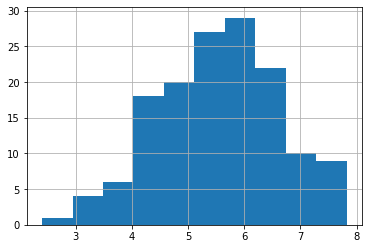

In [ ]:
hist = data['Happiness'].hist() # с помощью pandas

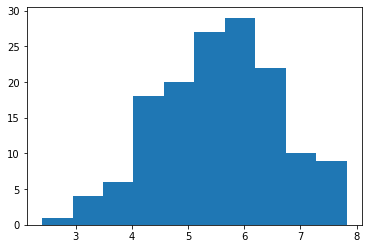

In [ ]:
import matplotlib.pyplot as plt # с помощью matplotlib
plt.hist(data['Happiness'])
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


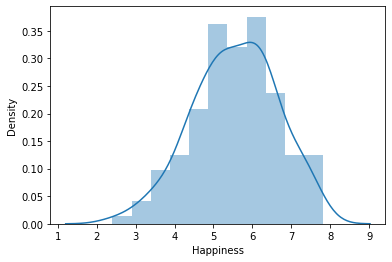

In [ ]:
import seaborn as sns
sns_plot = sns.distplot(data['Happiness']) # с помощью seaborn
# Внимание! Что-то не так?

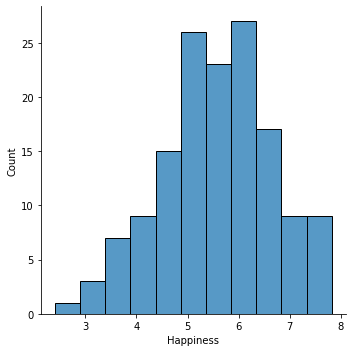

In [ ]:
sns_plot = sns.displot(data['Happiness']) # с помощью seaborn

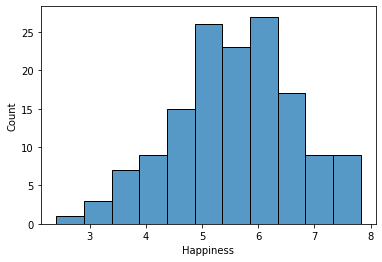

In [ ]:
sns_plot = sns.histplot(data['Happiness']) # с помощью seaborn

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="Happiness")
fig.show()

## Больше визуализаций

Что еще можно визуализировать?

In [ ]:
print(data[['Happiness', 'GDP per capita']].corr())

                Happiness  GDP per capita
Happiness        1.000000        0.763677
GDP per capita   0.763677        1.000000


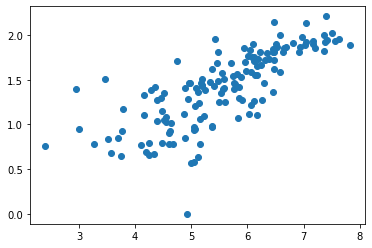

In [ ]:
plt.scatter(x = data['Happiness'], y = data['GDP per capita'])
plt.show()

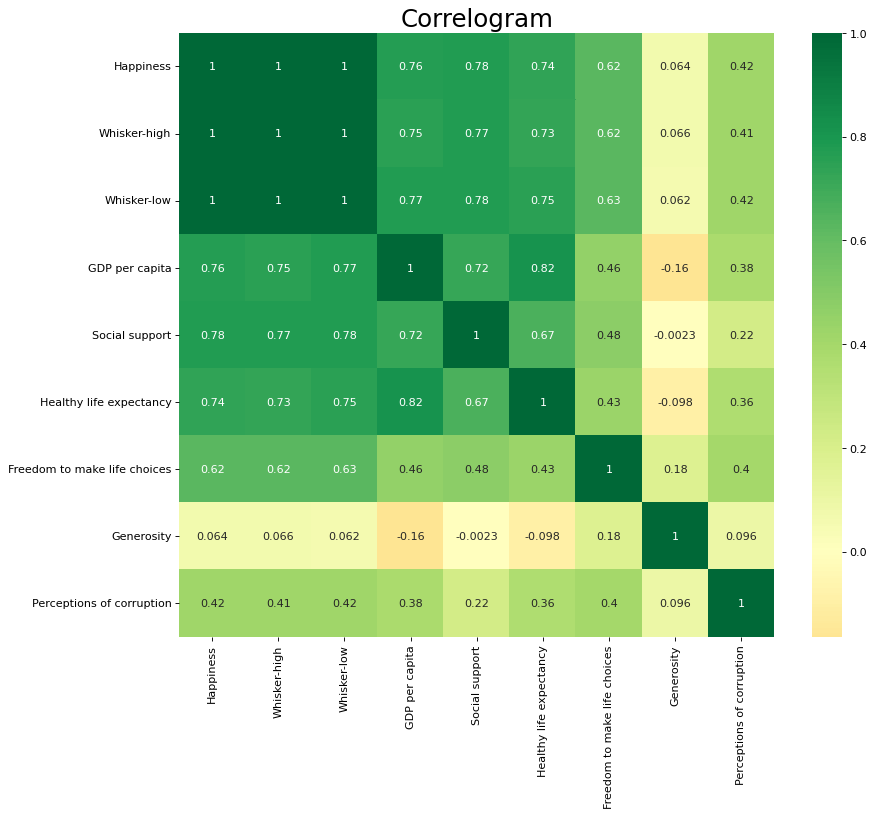

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22)
plt.show()

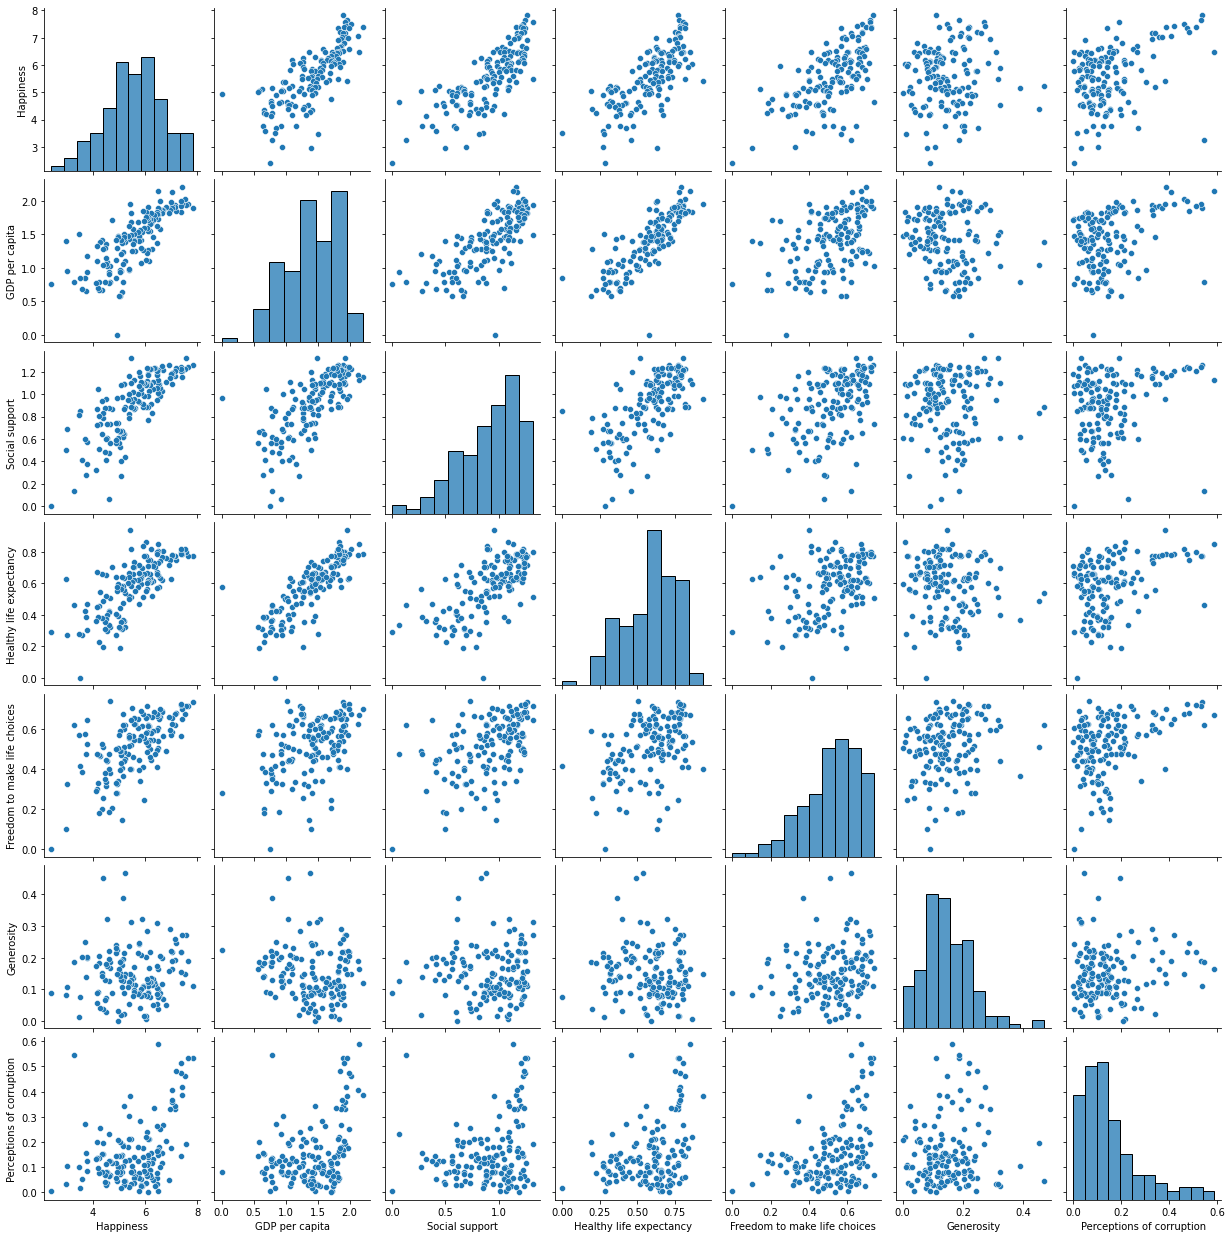

In [ ]:
data2 = pd.DataFrame(data, columns=['Happiness',	'GDP per capita',	'Social support',	'Healthy life expectancy',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption'])
sns.pairplot(data2)
plt.show()

## Еще больше визуализаций!

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
len(world)

177

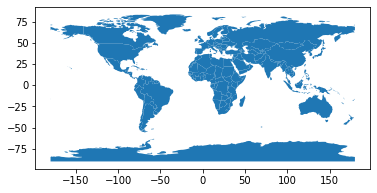

In [ ]:
world.plot()

In [ ]:
data_world = pd.merge(world, data, left_on='name', right_on='Country') # соединили 2 датасета

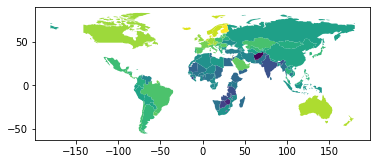

In [ ]:
data_world.plot(column ='Happiness')

## Сохраним данные в файл

Но сначала посмотрим, все ли в порядке?

In [ ]:
data_world.head() 

,pop_est,continent,iso_a3,gdp_md_est,geometry,Country,Happiness,Whisker-high,Whisker-low,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.702,3.847,3.558,0.848,0.597,0.425,0.578,0.248,0.270
1,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.025,7.107,6.943,1.886,1.188,0.783,0.659,0.217,0.368
2,18556698,Asia,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,6.234,6.330,6.138,1.668,1.220,0.611,0.584,0.134,0.157
3,29748859,Asia,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,6.063,6.178,5.948,1.219,1.092,0.600,0.716,0.283,0.240
4,260580739,Asia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,5.240,5.341,5.139,1.382,0.883,0.539,0.620,0.468,0.047


In [ ]:
data_world = data_world.drop(columns='name')

In [ ]:
data_world.head()

In [ ]:
data_world.to_excel('data_world.xlsx')

## Бонус!

In [ ]:
import pandas as pd
dh = pd.read_csv('https://raw.githubusercontent.com/hepplerj/whatisdigitalhumanities/master/dayofquotes_full.csv') 
dh.head()

,quote,name,date
0,The thoughtful use of computing in humanistic ...,Geoffrey Rockwell,2012-01-01
1,Digital humanities is the use of advanced digi...,Micki McGee,2012-01-01
2,"Researchers working with digital materials, to...",Stan Ruecker,2012-01-01
3,All the ways that the humanities and digital t...,Rebecca Davis,2012-01-01
4,Digital Humanities is the use of digital techn...,Michael Widner,2012-01-01


Информация о [датасете](https://github.com/hepplerj/whatisdigitalhumanities) 

In [ ]:
quote = dh['quote']
quote

0      The thoughtful use of computing in humanistic ...
1      Digital humanities is the use of advanced digi...
2      Researchers working with digital materials, to...
3      All the ways that the humanities and digital t...
4      Digital Humanities is the use of digital techn...
                             ...                        
786    Any academic, archival, pedagogical, or projec...
787    Digital Humanities an interdiscipline where co...
788    Investigating humanities questions using digit...
789    DH is the study, exploration, and preservation...
790    The creative application of digital technology...
Name: quote, Length: 791, dtype: object

In [ ]:
import random
text = random.choice(quote)
text

'Through the things I make'

Разобьем текст на фрагменты одинаковой длины:

In [ ]:
start = 0
ind = 0
textdh = []
n = 1
if len(text) <= 40:
  textdh.append(text)
else:
  for i in text:
    while len(text[start:]) > 40:
      ind = text.find(' ', 40 + start + 1) 
      part = text[start:ind] 
      textdh.append(part + ' \n ')
      start = ind + 1 
  textdh.append(text[start:])
textdh

['Through the things I make']

Соединим обратно:

In [ ]:
textdh = ('\n'.join(textdh)) 

In [ ]:
textdh

"Digital Humanities is a broad, creative, interdisciplinary \n \nfield that brings together quantitative analysis \n \nand the humanities. This incorporates not \n \njust text analysis, but visual imaging and \n \ndesign (what I'm interested in), community \n \ncollaboration, and scholarship across the \n \ncontinents."

In [ ]:
pip install Pillow

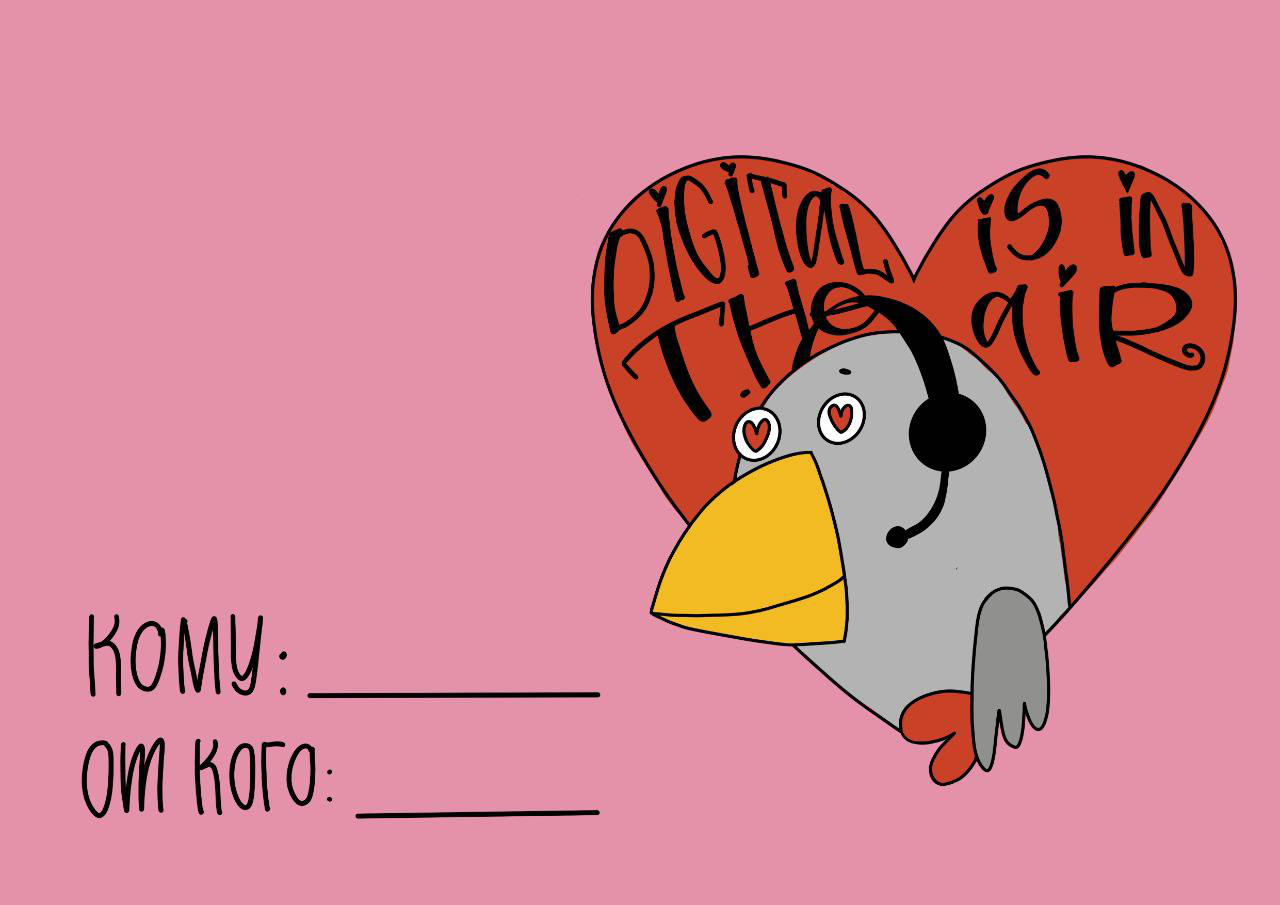

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from io import BytesIO
import requests

url = 'https://raw.githubusercontent.com/AnnSenina/AnnSenina/main/photo_2022-02-14_18-00-21.jpg'
# 

response = requests.get(url)
img = Image.open(BytesIO(response.content))


img

Цифровой блок и проект «Цифровые ассистенты» в 2022 году подготовили 

---

открытки-валентинки

Для всех влюблённых в digital и не только

In [ ]:
addressee = 'Iliana' # введите имя получателя
me = 'Ann' # введите ваше имя

In [ ]:
fonts = ['1.ttf', '2.ttf', '3.ttf', '4.ttf', '5.ttf', '6.ttf', '7.otf', '8.otf', '9.ttf', '10.ttf', '11.ttf', '12.ttf', '13.otf', '14.ttf', '15.ttf', '16.ttf', '17.ttf', '18.ttf', '19.ttf']
import random
f = random.choice(fonts)
f

'6.ttf'

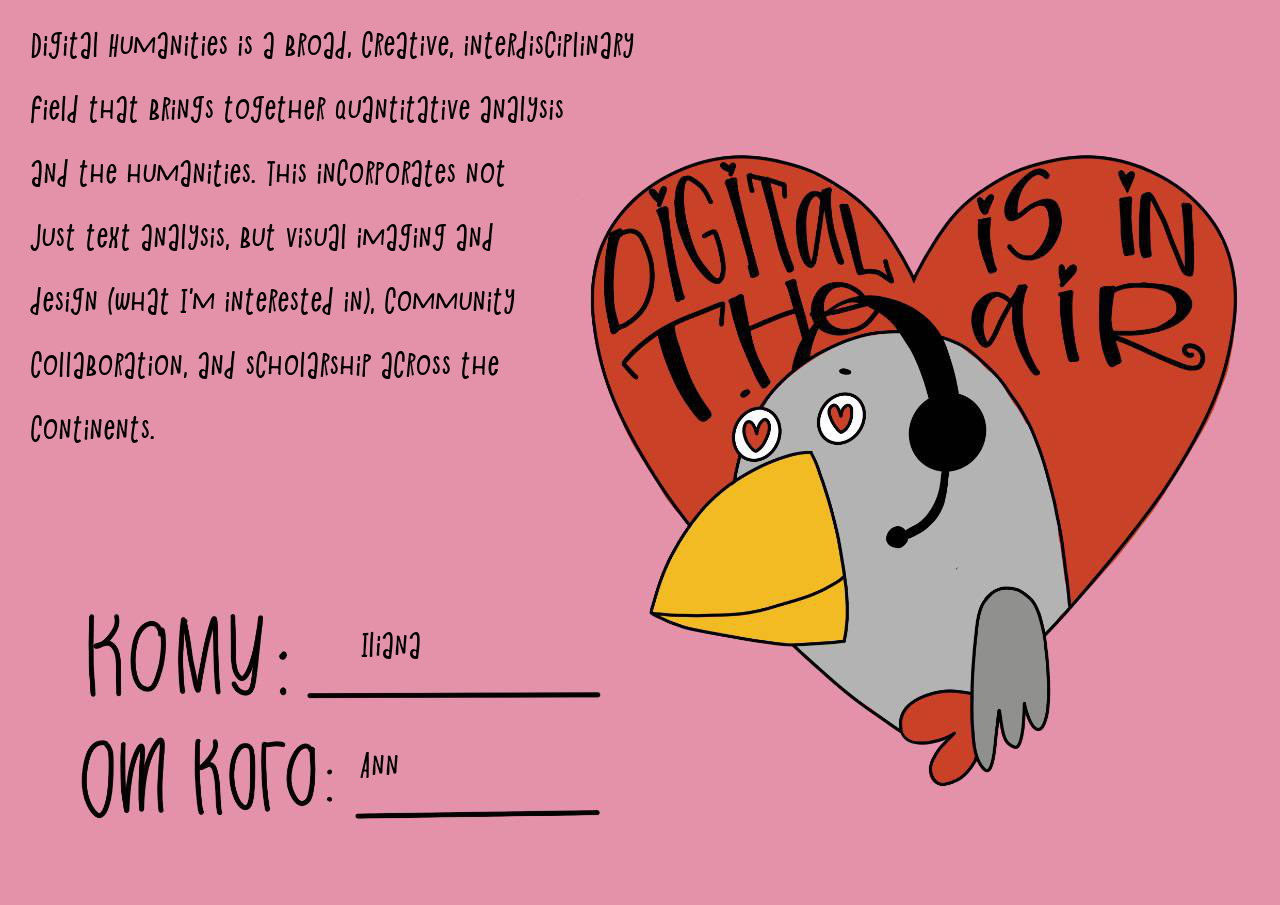

In [ ]:
draw = ImageDraw.Draw(img)
font = ImageFont.truetype(f, 30)
# font = ImageFont.load_default()
draw.text((30, 30), textdh, (0,0,0),font=font)
draw.text((360, 630), addressee,(0,0,0),font=font)
draw.text((360, 750), me,(0,0,0),font=font)
img.save('sample-out.jpg')
img